# Task - 5

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------------
# Step 1: Load the Dataset
# ---------------------------------
df = pd.read_csv("heart.csv")

# ---------------------------------
# Step 2: Data Cleaning
# ---------------------------------
print("Initial shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# If there are missing values, we can fill or drop them:
# Example (not always necessary for heart.csv):
# df = df.fillna(df.median())

# Confirm final state
print("\nCleaned Data Info:")
print(df.info())

Initial shape: (1025, 14)

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
After removing duplicates: (302, 14)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  

In [8]:
# Step 3: Prepare Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


=== Decision Tree ===
Accuracy: 0.7377049180327869
Confusion Matrix:
 [[25  7]
 [ 9 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



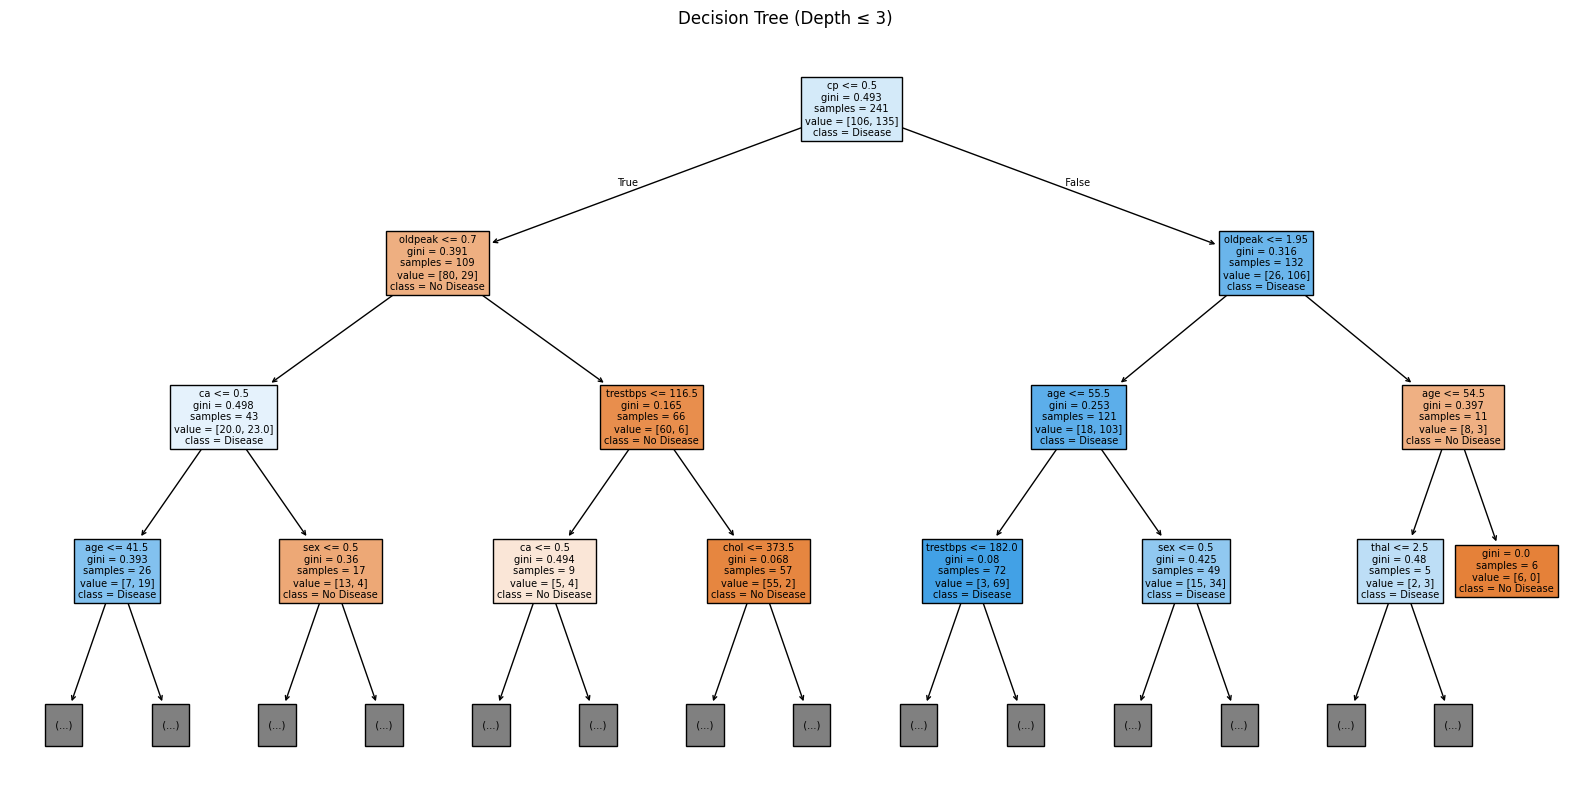

In [9]:

# Step 4: Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, max_depth=3)
plt.title("Decision Tree (Depth ≤ 3)")
plt.show()


In [10]:
# Step 5: Pruned Decision Tree
pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)

print("\n=== Pruned Tree (max_depth=4) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))


=== Pruned Tree (max_depth=4) ===
Accuracy: 0.7377049180327869


In [11]:
# Step 6: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  7]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



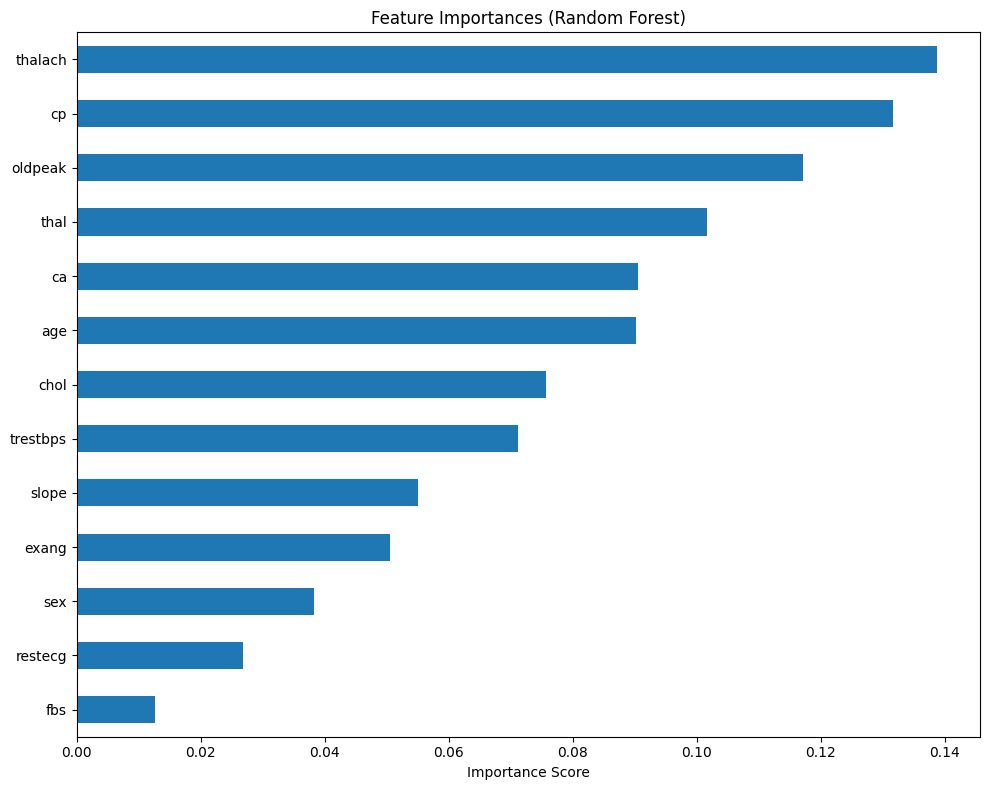

In [12]:
 # Step 7: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), title="Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [13]:
# Step 8: Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\n=== Cross-Validation (Random Forest, 5-Fold) ===")
print("CV Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


=== Cross-Validation (Random Forest, 5-Fold) ===
CV Scores: [0.83606557 0.81967213 0.9        0.8        0.78333333]
Mean Accuracy: 0.8278142076502732
